In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('top10s.csv', encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
print('quantidade de músicas:\n',df.__len__())

quantidade de músicas:
 603


In [5]:
print('quantidade de gêneros musicais diferentes:\n',df['top genre'].nunique())

quantidade de gêneros musicais diferentes:
 50


In [6]:
df.groupby(['top genre']).size().sort_values(ascending=False)


top genre
dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
australian dance               6
hip pop                        6
complextro                     6
edm                            5
atl hip hop                    5
australian pop                 5
hip hop                        4
latin                          4
permanent wave                 4
colombian pop                  3
tropical house                 3
escape room                    2
baroque pop                    2
belgian edm                    2
canadian hip hop               2
acoustic pop                   2
indie pop                      2
electro                        2
folk-pop                       2


In [7]:
# remover colunas que não serão usadas na classificação
df = df.drop(columns=['Unnamed: 0', 'title', 'artist', 'year'])

df.head()


,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,neo mellow,97,89,67,-4,8,80,217,19,4,83
1,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2,dance pop,120,84,76,-3,29,71,200,10,14,80
3,dance pop,119,92,70,-4,8,71,295,0,4,79
4,pop,109,84,64,-5,9,43,221,2,4,78


In [8]:
# move a coluna 'top genre' para o final do dataframe, pois será o atributo classificador
df['top genre'] = df.pop('top genre')

In [9]:
df.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,97,89,67,-4,8,80,217,19,4,83,neo mellow
1,87,93,75,-5,52,64,263,24,23,82,detroit hip hop
2,120,84,76,-3,29,71,200,10,14,80,dance pop
3,119,92,70,-4,8,71,295,0,4,79,dance pop
4,109,84,64,-5,9,43,221,2,4,78,pop


In [10]:
X = df.iloc[:, 0:10] # colunas de 0 a 10 referem-se aos atributos preditores

y = df.iloc[:, 10] # coluna 10, referente a "genre" (atributo calssificador)

In [11]:
# atributos preditores
X.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78


In [12]:
# atributo calssificador
y.head()

0         neo mellow
1    detroit hip hop
2          dance pop
3          dance pop
4                pop
Name: top genre, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [15]:
print('tamanho do treino:\n',X_treino.__len__())

tamanho do treino:
 422


In [16]:
print('tamanho do teste:\n',X_teste.__len__())


tamanho do teste:
 181


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()
rf.fit(X_treino, y_treino)

RandomForestClassifier()

In [19]:
previsoes = rf.predict(X_teste)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [21]:
#Matriz de Confusão e validação da classificação

#                       classificação_real, classificação prevista
matriz_confusao = confusion_matrix(y_teste, previsoes)

acuracia = accuracy_score(y_teste, previsoes)

print('matriz de confusao:\n',matriz_confusao)
print('\nacurácia:\n',acuracia)

matriz de confusao:
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
   0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

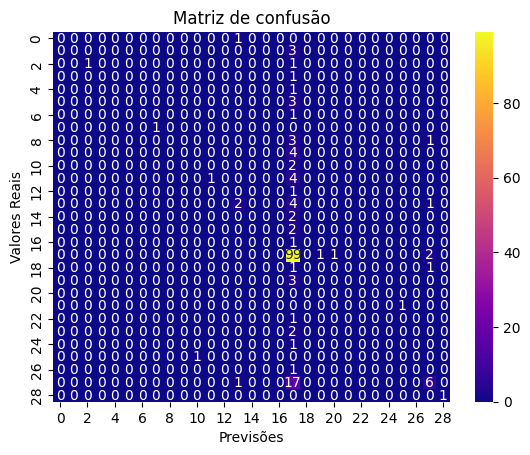

In [23]:
sns.heatmap(matriz_confusao, annot = True, fmt='d', cmap = 'plasma')
plt.xlabel("Previsões")
plt.ylabel("Valores Reais")

plt.title("Matriz de confusão")
plt.show()

In [24]:
print(classification_report(y_teste, previsoes))

                           precision    recall  f1-score   support

          alternative r&b       0.00      0.00      0.00         1
                  art pop       0.00      0.00      0.00         3
              atl hip hop       1.00      0.50      0.67         2
         australian dance       0.00      0.00      0.00         1
           australian pop       0.00      0.00      0.00         1
            barbadian pop       0.00      0.00      0.00         3
              baroque pop       0.00      0.00      0.00         1
              belgian edm       1.00      1.00      1.00         1
                 big room       0.00      0.00      0.00         4
                 boy band       0.00      0.00      0.00         4
             british soul       0.00      0.00      0.00         2
canadian contemporary r&b       1.00      0.20      0.33         5
         canadian hip hop       0.00      0.00      0.00         1
             canadian pop       0.50      0.29      0.36     

c:\Users\andre\Documents\GitHub\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\Documents\GitHub\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\Documents\GitHub\projeto-cd\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(